In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import nltk
from nltk.corpus import stopwords

In [3]:
plt.style.use('ggplot')

# Data Loading

In [4]:
episodeIV = pd.read_csv('SW_EpisodeIV.txt', delim_whitespace=True, names=["index","character","dialogue"], index_col='index', skiprows = [0], header = None)
episodeV = pd.read_csv('SW_EpisodeV.txt', delim_whitespace=True, names=["index","character","dialogue"], index_col='index', skiprows = [0], header = None)
episodeVI = pd.read_csv('SW_EpisodeVI.txt', delim_whitespace=True, names=["index","character","dialogue"], index_col='index', skiprows = [0], header = None)

# Dialogue Counts

In [5]:
eIV_dialoguecount = episodeIV.character.value_counts()
eV_dialoguecount = episodeV.character.value_counts()
eVI_dialoguecount = episodeVI.character.value_counts()

# LowerCase Mapping

In [6]:
episodeIV = episodeIV.applymap(str.lower)

# Text feature

In [7]:
text = episodeIV['dialogue'].tolist()

In [8]:
flatten_text = ''.join(text)

# Tokenization

In [9]:
from nltk.tokenize import sent_tokenize, word_tokenize

## Sentence Tokenization 

In [10]:
episodeIV['sent_tokenize'] = episodeIV.apply(lambda row: sent_tokenize(row['dialogue']), axis=1)

text_sent_tokenize = sent_tokenize(flatten_text)

## Word Tokenization 

In [11]:
episodeIV['word_tokenize'] = episodeIV.apply(lambda row: word_tokenize(row['dialogue']), axis=1)

text_word_tokenize = word_tokenize(flatten_text)

# Filter Out Punctuation

In [12]:
words = [word.lower() for word in text_word_tokenize if word.isalpha()]

In [24]:
len(words)

10057

# Stop Word

In [13]:
stop_words=set(stopwords.words("english"))

In [14]:
stwords = [w for w in words if not w in stop_words]

In [25]:
len(stwords)

4559

# Frequency Distribution

In [15]:
from nltk.probability import FreqDist

In [16]:
episodeIV['FreqDist'] = episodeIV.apply(lambda row: FreqDist(row['word_tokenize']), axis=1)

In [32]:
dist = FreqDist(stwords)
dist.most_common(10)

[('going', 69),
 ('get', 58),
 ('luke', 46),
 ('right', 44),
 ('come', 42),
 ('know', 39),
 ('got', 38),
 ('see', 37),
 ('think', 37),
 ('us', 36)]

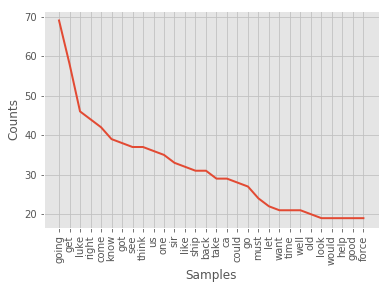

In [35]:
dist.plot(30)

# Text Normalization

## Stemmers

In [18]:
from nltk.stem import PorterStemmer

In [19]:
stemmer = PorterStemmer()

In [20]:
episodeIV['stemmed8V2'] = episodeIV.apply(lambda row: [stemmer.stem(y) for y in row['word_tokenize']], axis=1)

## Lemmarization

In [21]:
from nltk.stem import WordNetLemmatizer

In [22]:
lemmatizer = WordNetLemmatizer() 

In [23]:
episodeIV['lemmatized'] = episodeIV.apply(lambda row: [lemmatizer.lemmatize(y) for y in row['word_tokenize']], axis=1)